In [19]:
!pip install matplotlib
!pip install -U scikit-learn

In [20]:
import pandas
import numpy

In [21]:
import pandas as pd

# Try reading the file with a different encoding
try:
    dfspam = pd.read_csv('spam.csv', encoding='latin1')
    # Print the first 5 rows
    print(dfspam.head())
except UnicodeDecodeError as e:
    print("UnicodeDecodeError: ", e)


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [22]:
print(dfspam)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [23]:
print(dfspam.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [24]:
df=dfspam.iloc[:,[0,1]]

In [25]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
print(df.columns)

Index(['v1', 'v2'], dtype='object')


In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder_v1 = LabelEncoder()
label_encoder_v2 = LabelEncoder()

# Fit and transform the data
df['v1'] = label_encoder_v1.fit_transform(df['v1'])
df['v2'] = label_encoder_v2.fit_transform(df['v2'])

print(df)

      v1    v2
0      0  1079
1      0  3101
2      1  1000
3      0  4088
4      0  2757
...   ..   ...
5567   1  3992
5568   0  4560
5569   0  3286
5570   0  3901
5571   0  3409

[5572 rows x 2 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_3340\4105412853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1'] = label_encoder_v1.fit_transform(df['v1'])
C:\Users\HP\AppData\Local\Temp\ipykernel_3340\4105412853.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2'] = label_encoder_v2.fit_transform(df['v2'])


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


In [29]:

# Split data into x (features) and y (target)
X = df[['v2']]
y = df['v1']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_weight_fraction_leaf': [0.0],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'bootstrap': [True],
    'oob_score': [False],
    'n_jobs': [None],
    'random_state': [42],
    'verbose': [0],
    'warm_start': [False],
    'class_weight': [None],
    'ccp_alpha': [0.0],
    'max_samples': [None],
    'monotonic_cst': [None]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 66

In [33]:
best_rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [34]:
y_pred = best_rf.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9139013452914798
Precision: 0.9068252987399439
Recall: 0.9139013452914798
Confusion Matrix:
[[943  22]
 [ 74  76]]


True Positive: 76
True Negative: 943
False Positive: 22
False Negative: 74


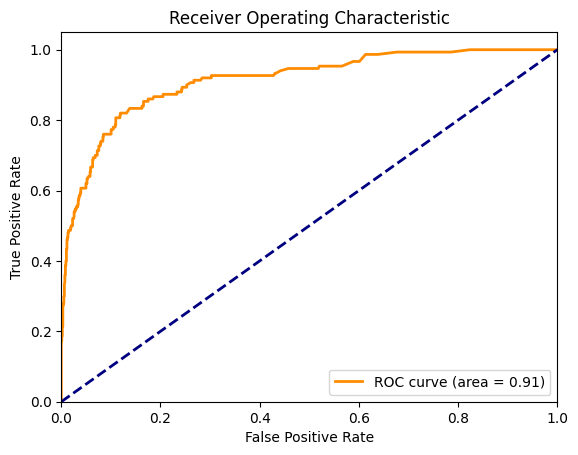

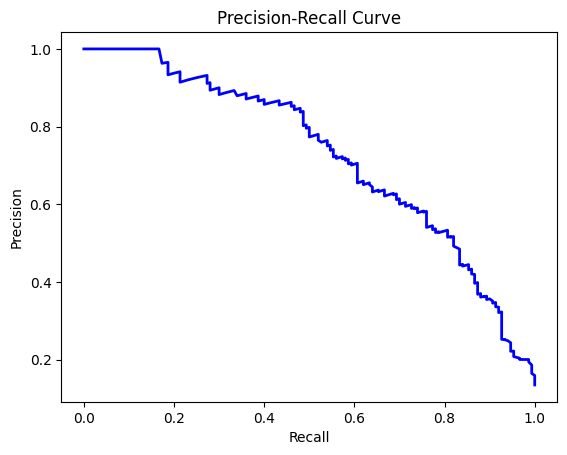

In [35]:
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# ROC Curve
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob, pos_label=1)

plt.figure()
plt.plot(recall_vals, precision_vals, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
